In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re

In [3]:
dataset = pd.read_csv("../data/Grammar Correction.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Serial Number            2018 non-null   int64 
 1   Error Type               2018 non-null   object
 2   Ungrammatical Statement  2018 non-null   object
 3   Standard English         2018 non-null   object
dtypes: int64(1), object(3)
memory usage: 63.2+ KB


In [5]:
dataset.head(5)

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [6]:
dataset.drop(columns='Serial Number',inplace=True)

In [7]:
dataset['Error Type'].unique()

array(['Verb Tense Errors', 'Subject-Verb Agreement', 'Article Usage',
       'Preposition Usage', 'Sentence Structure Errors',
       'Spelling Mistakes', 'Punctuation Errors', 'Capitalization Errors',
       'Word Choice/Usage', 'Run-on Sentences', 'Sentence Fragments',
       'Redundancy/Repetition', 'Mixed Metaphors/Idioms',
       'Passive Voice Overuse', 'Pronoun Errors', 'Conjunction Misuse',
       'Modifiers Misplacement',
       'Agreement in Comparative and Superlative Forms',
       'Parallelism Errors', 'Quantifier Errors', 'Tautology',
       'Inappropriate Register', 'Ambiguity', 'Mixed Conditionals',
       'Faulty Comparisons', 'Incorrect Auxiliaries', 'Negation Errors',
       'Ellipsis Errors', 'Slang, Jargon, and Colloquialisms', 'Clichés',
       'Abbreviation Errors', 'Contractions Errors',
       'Relative Clause Errors', 'Infinitive Errors',
       'Gerund and Participle Errors',
       'Lack of Parallelism in Lists or Series'], dtype=object)

In [8]:
mapping = {
    "Run-on Sentences": "Sentence Structure Errors",
    "Sentence Fragments": "Sentence Structure Errors",

    "Lack of Parallelism in Lists or Series": "Parallelism Errors",

    "Tautology": "Redundancy/Repetition",
}

dataset["Error Type Cleaned"] = dataset["Error Type"].replace(mapping)


In [9]:
dataset.isna().sum()

Error Type                 0
Ungrammatical Statement    0
Standard English           0
Error Type Cleaned         0
dtype: int64

In [10]:
dataset.duplicated().sum()

0

In [11]:
all_text = " ".join(dataset['Ungrammatical Statement'].dropna().tolist())

words = re.findall(r'\b\w+\b', all_text.lower())

word_counts = Counter(words)

most_common = word_counts.most_common(20)
print(most_common)


[('the', 2079), ('to', 518), ('a', 504), ('is', 473), ('was', 354), ('and', 305), ('i', 279), ('of', 277), ('in', 271), ('she', 258), ('s', 247), ('he', 217), ('it', 204), ('for', 155), ('on', 149), ('t', 133), ('by', 132), ('they', 118), ('at', 115), ('are', 114)]


In [12]:
all_text = " ".join(dataset['Standard English'].dropna().tolist())

words = re.findall(r'\b\w+\b', all_text.lower())

word_counts = Counter(words)

most_common = word_counts.most_common(20)
print(most_common)

[('the', 2118), ('to', 495), ('is', 449), ('a', 379), ('and', 342), ('was', 319), ('i', 293), ('in', 264), ('she', 256), ('of', 231), ('he', 214), ('s', 172), ('for', 151), ('on', 135), ('at', 133), ('t', 121), ('are', 112), ('it', 101), ('were', 95), ('new', 92)]


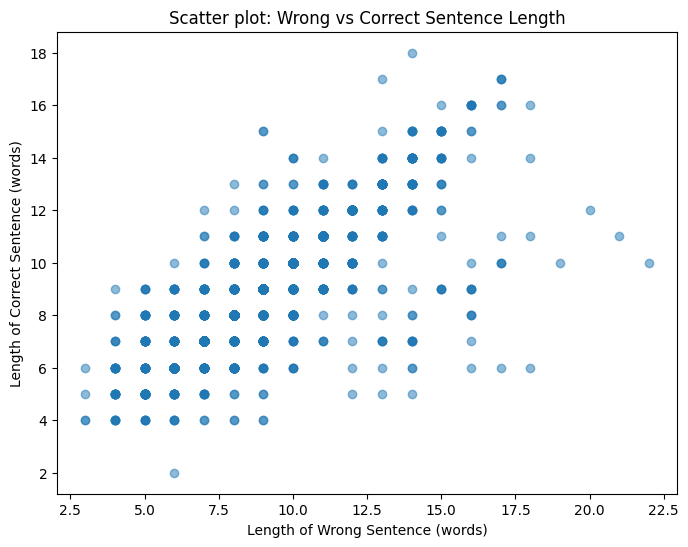

In [13]:
dfcopy=dataset.copy()
dfcopy['wrong_len'] = dataset['Ungrammatical Statement'].apply(lambda x: len(str(x).split()))
dfcopy['correct_len'] = dataset['Standard English'].apply(lambda x: len(str(x).split()))

# رسم scatter
plt.figure(figsize=(8,6))
plt.scatter(dfcopy['wrong_len'], dfcopy['correct_len'], alpha=0.5)
plt.xlabel("Length of Wrong Sentence (words)")
plt.ylabel("Length of Correct Sentence (words)")
plt.title("Scatter plot: Wrong vs Correct Sentence Length")
plt.show()


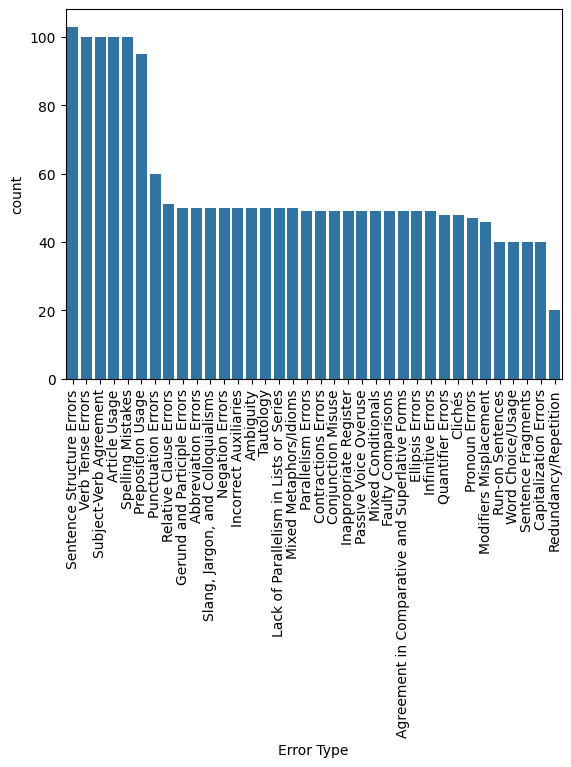

In [14]:
sns.countplot(x="Error Type", data=dataset,order=dataset['Error Type'].value_counts().index)  
plt.xticks(rotation=90)  
plt.show()